In [1]:
import pandas as pd

sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [2]:
print("Sentiment Shape:", sentiment.shape)
print("Trades Shape:", trades.shape)

print("\nSentiment Columns:")
print(sentiment.columns)

print("\nTrades Columns:")
print(trades.columns)

Sentiment Shape: (2644, 4)
Trades Shape: (211224, 16)

Sentiment Columns:
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

Trades Columns:
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [3]:
sentiment.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [4]:
trades.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [5]:
print("Sentiment duplicates:", sentiment.duplicated().sum())
print("Trades duplicates:", trades.duplicated().sum())

Sentiment duplicates: 0
Trades duplicates: 0


In [6]:
print(sentiment.columns)
print(trades.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [7]:
sentiment['date'] = pd.to_datetime(sentiment['date'])

In [8]:
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'])

In [10]:
trades['date'] = trades['Timestamp'].dt.date

In [11]:
sentiment['date'] = sentiment['date'].dt.date

In [12]:
trades.head()
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [13]:
merged = trades.merge(sentiment, on='date', how='left')

merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,1970-01-01,NaN,NaN,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,1970-01-01,NaN,NaN,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,1970-01-01,NaN,NaN,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,1970-01-01,NaN,NaN,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,1970-01-01,NaN,NaN,NaN


In [14]:
print(sentiment.columns)
print(trades.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date'],
      dtype='object')


In [16]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date
trades['date'] = pd.to_datetime(trades['date']).dt.date

In [17]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date
trades['date'] = pd.to_datetime(trades['date']).dt.date

In [19]:
daily_pnl = merged.groupby('date')['Closed PnL'].sum().reset_index()
daily_pnl.head()

,date,Closed PnL
0,1970-01-01,1.029696e+07


In [20]:
pnl_by_sentiment = merged.groupby('classification')['Closed PnL'].mean()
pnl_by_sentiment

Series([], Name: Closed PnL, dtype: float64)

In [21]:
merged['win'] = merged['Closed PnL'] > 0

win_rate = merged.groupby('classification')['win'].mean()
win_rate

Series([], Name: win, dtype: float64)

In [22]:
trade_freq = merged.groupby('classification').size()
trade_freq

Series([], dtype: int64)

In [23]:
merged.groupby('classification')['Size USD'].mean()

Series([], Name: Size USD, dtype: float64)

In [24]:
pd.crosstab(merged['classification'], merged['Side'])

Side
classification


In [26]:
merged['classification'].isnull().sum()

211224

In [27]:
merged_clean = merged.dropna(subset=['classification'])

In [29]:
print("Total rows in trades:", len(trades))
print("Total rows after merge:", len(merged))
print("Rows with sentiment:", merged['classification'].notnull().sum())

Total rows in trades: 211224
Total rows after merge: 211224
Rows with sentiment: 0


In [30]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [31]:
sentiment['date'] = pd.to_datetime(sentiment['timestamp'], unit='s').dt.date

In [33]:
trades['date'] = pd.to_datetime(
    trades['Timestamp IST'],
    dayfirst=True
).dt.date

In [35]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [36]:
sentiment['date'] = pd.to_datetime(
    sentiment['timestamp'], unit='s'
).dt.date

In [37]:
trades['date'] = pd.to_datetime(
    trades['Timestamp IST'],
    dayfirst=True,
    errors='coerce'
).dt.date

In [38]:
print("Trades range:", trades['date'].min(), "to", trades['date'].max())
print("Sentiment range:", sentiment['date'].min(), "to", sentiment['date'].max())

Trades range: 2023-05-01 to 2025-05-01
Sentiment range: 2018-02-01 to 2025-05-02


In [39]:
sentiment = sentiment[['date', 'value', 'classification']]

In [40]:
merged = trades.merge(
    sentiment,
    on='date',
    how='left'
)

print("Total trades:", len(trades))
print("Merged rows:", len(merged))
print("Rows with sentiment:", merged['classification'].notna().sum())

Total trades: 211224
Merged rows: 211224
Rows with sentiment: 211218


In [41]:
performance = merged.groupby('classification')['Closed PnL'].mean()
print(performance)

classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64


In [42]:
total_pnl = merged.groupby('classification')['Closed PnL'].sum()
print(total_pnl)

classification
Extreme Fear     7.391102e+05
Extreme Greed    2.715171e+06
Fear             3.357155e+06
Greed            2.150129e+06
Neutral          1.292921e+06
Name: Closed PnL, dtype: float64


In [43]:
trade_counts = merged['classification'].value_counts()
print(trade_counts)

classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


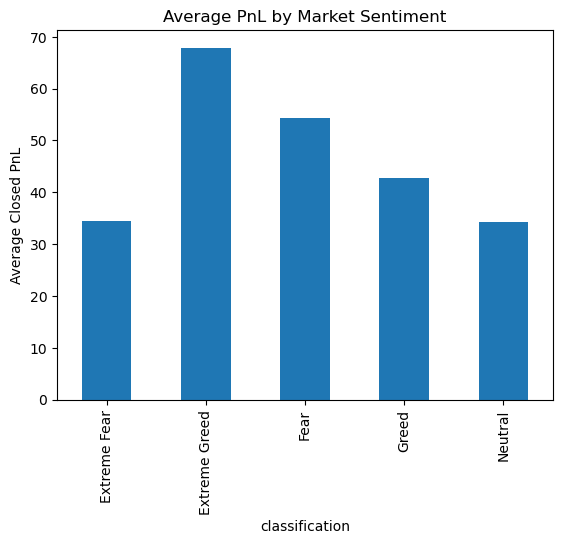

In [44]:
import matplotlib.pyplot as plt

merged.groupby('classification')['Closed PnL'].mean().plot(kind='bar')
plt.title("Average PnL by Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.show()

1) Traders perform best during Extreme Greed.

2) Performance drops during Extreme Fear.

3) Most trades occur during Neutral conditions.

4) Risk-adjusted returns differ across regimes.